In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(context='paper',font_scale=1.2,style='whitegrid')
figsize = (5,5)
plot_folder = Path('../figures/confidence_cutoff_plots')
plot_folder.mkdir(exist_ok=True)
af2_plddt_antibody_df = pd.read_csv('../data/AF2_antibody_rmsd_plddt_multi_regions.csv')
af2_plddt_antibody_df = af2_plddt_antibody_df.loc[(af2_plddt_antibody_df['pdb'] != '7kpj') & (af2_plddt_antibody_df['pdb'] !='7kn4')]
af2_plddt_antigen_df = pd.read_csv('../data/AF2_antigen_rmsd_plddt_multi_regions.csv')
af2_plddt_antigen_df = af2_plddt_antigen_df.loc[(af2_plddt_antigen_df['pdb'] != '7kpj') & (af2_plddt_antigen_df['pdb'] !='7kn4')]
abb2_conf_df = pd.read_csv('../data/ABB2_antibody_rmsd_conf.csv')
abb2_conf_df = abb2_conf_df.loc[(abb2_conf_df['pdb'] != '7kpj') & (abb2_conf_df['pdb'] !='7kn4')]

frac_remaining=0.9


frac_remaining=0.9
frac_remain_rmsd_para=1.67544327114298, frac_remove_rmsd_para=3.4847223585818075, full set mean 1.8815636735094288
frac_remain_rmsd_epi=0.9071095913235642, frac_remove_rmsd_epi=2.5086505875186753, full set mean 1.0692909580268666


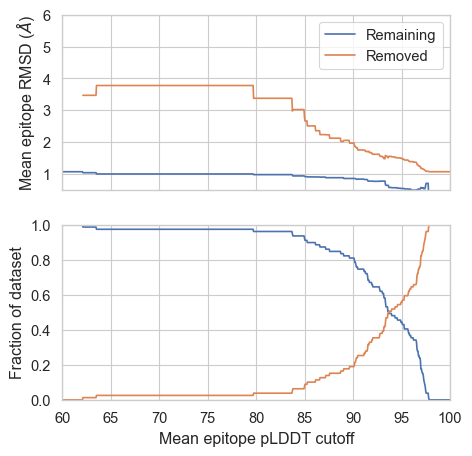

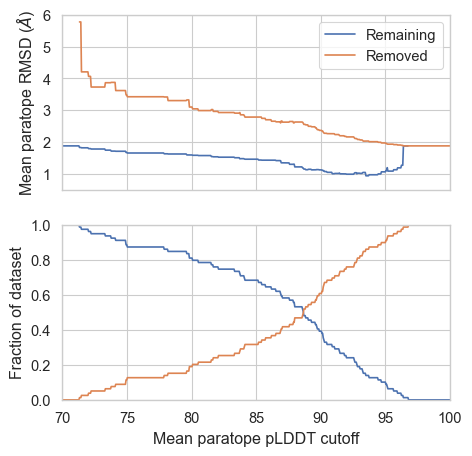

In [13]:
plddt_cutoffs = np.linspace(50,100,num=1000)
rmsd_mean_epitope_cutoff_remain = [af2_plddt_antigen_df.query('plddt_ave_para_epi > @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]
rmsd_mean_epitope_cutoff_remove = [af2_plddt_antigen_df.query('plddt_ave_para_epi <= @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]

rmsd_mean_paratope_cutoff_remain = [af2_plddt_antibody_df.query('plddt_ave_para_epi > @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]
rmsd_mean_paratope_cutoff_remove = [af2_plddt_antibody_df.query('plddt_ave_para_epi <= @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]

count_epitope = np.array([len(af2_plddt_antigen_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
count_paratope = np.array([len(af2_plddt_antibody_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
frac_epitope = count_epitope / len(af2_plddt_antigen_df)
frac_paratope = count_paratope / len(af2_plddt_antibody_df)

frac_remain_rmsd_para = rmsd_mean_paratope_cutoff_remain[np.where(frac_paratope<=frac_remaining)[0][0]]
frac_remain_rmsd_epi = rmsd_mean_epitope_cutoff_remain[np.where(frac_epitope<=frac_remaining)[0][0]]

frac_remove_rmsd_para = rmsd_mean_paratope_cutoff_remove[np.where(frac_paratope<=frac_remaining)[0][0]]
frac_remove_rmsd_epi = rmsd_mean_epitope_cutoff_remove[np.where(frac_epitope<=frac_remaining)[0][0]]

print(f"{frac_remaining=}")
print(f"{frac_remain_rmsd_para=}, {frac_remove_rmsd_para=}, full set mean {af2_plddt_antibody_df['rmsd_para_epi'].mean()}")
print(f"{frac_remain_rmsd_epi=}, {frac_remove_rmsd_epi=}, full set mean {af2_plddt_antigen_df['rmsd_para_epi'].mean()}")


fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
ax[0].plot(plddt_cutoffs,rmsd_mean_epitope_cutoff_remain, label='Remaining')
ax[0].plot(plddt_cutoffs,rmsd_mean_epitope_cutoff_remove, label='Removed')
ax[1].plot(plddt_cutoffs,frac_epitope, label='Remaining')
ax[1].plot(plddt_cutoffs,1-frac_epitope, label='Removed')
ax[0].legend(loc='best')
ax[0].set_xlim(left=60,right=100)
ax[1].set_xlabel('Mean epitope pLDDT cutoff')
ax[1].set_ylabel('Fraction of dataset')
ax[0].set_yticks([1,2,3,4,5,6])
ax[0].set_ylim(0.5,6)
ax[1].set_ylim([0,1])
ax[0].set_ylabel(r'Mean epitope RMSD ($\AA$)')
fig.savefig(plot_folder/'plddt_epitope_cutoff_vs_rmsd.png',dpi=200)

fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
ax[0].plot(plddt_cutoffs,rmsd_mean_paratope_cutoff_remain,label='Remaining')
ax[0].plot(plddt_cutoffs,rmsd_mean_paratope_cutoff_remove,label='Removed')
ax[1].plot(plddt_cutoffs,frac_paratope,label='Remaining')
ax[1].plot(plddt_cutoffs,1-frac_paratope,label='Removed')

ax[0].legend(loc='best')
ax[0].set_xlim(left=70,right=100)
ax[1].set_xlabel('Mean paratope pLDDT cutoff')
ax[1].set_ylabel('Fraction of dataset')
ax[0].set_ylim(0.5,6)
ax[0].set_yticks([1,2,3,4,5,6])
ax[1].set_ylim([0,1])
ax[0].set_ylabel(r'Mean paratope RMSD ($\AA$)')
fig.savefig(plot_folder/'plddt_paratope_cutoff_vs_rmsd.png',dpi=200)

frac_remaining=0.9
frac_remain_rmsd_para=1.6740076451578294, frac_remove_rmsd_para=4.3430271613667255, full set mean 1.910503045328238


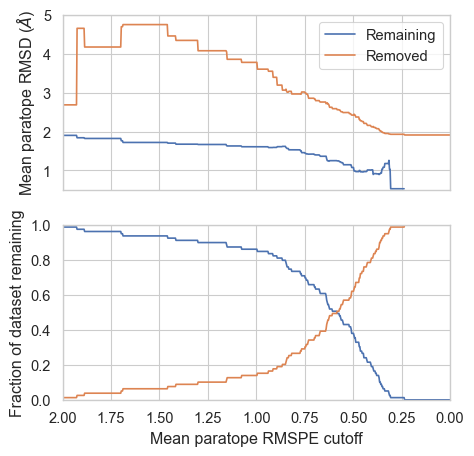

In [14]:
RMSPE_cutoffs = np.linspace(0,3,num=1000)
rmsd_mean_paratope_cutoff_remain = [abb2_conf_df.query('para_ave_conf < @cutoff')['rmsd_paratope'].mean() for cutoff in RMSPE_cutoffs]
rmsd_mean_paratope_cutoff_remove = [abb2_conf_df.query('para_ave_conf >= @cutoff')['rmsd_paratope'].mean() for cutoff in RMSPE_cutoffs]

count_paratope = np.array([len(abb2_conf_df.query('para_ave_conf < @cutoff')) for cutoff in RMSPE_cutoffs])
frac_paratope = count_paratope / len(abb2_conf_df)

frac_remain_rmsd_para = rmsd_mean_paratope_cutoff_remain[np.where(frac_paratope>=frac_remaining)[0][0]]
frac_remove_rmsd_para = rmsd_mean_paratope_cutoff_remove[np.where(frac_paratope>=frac_remaining)[0][0]]

print(f"{frac_remaining=}")
print(f"{frac_remain_rmsd_para=}, {frac_remove_rmsd_para=}, full set mean {abb2_conf_df['rmsd_paratope'].mean()}")


fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
ax[0].plot(RMSPE_cutoffs,rmsd_mean_paratope_cutoff_remain, label="Remaining")
ax[0].plot(RMSPE_cutoffs,rmsd_mean_paratope_cutoff_remove, label="Removed")

ax[1].plot(RMSPE_cutoffs,frac_paratope,label="Remaining")
ax[1].plot(RMSPE_cutoffs,1-frac_paratope,label="Removed")


frac_paratope = count_paratope / len(abb2_conf_df)

ax[0].legend(loc='best')
ax[1].set_xlabel('Mean paratope RMSPE cutoff')
ax[0].set_ylabel(r'Mean paratope RMSD ($\AA$)')
ax[1].set_ylabel('Fraction of dataset remaining')
ax[1].set_ylim([0,1])
ax[0].set_ylim([0.5,5])
ax[0].set_yticks([1,2,3,4,5])
ax[0].set_xlim([2.0,0])

fig.savefig(plot_folder/'RMSPE_cutoff_vs_rmsd.png',dpi=200)

In [4]:
def get_top_dockq(filepath: Path, n_ranks: int = 1):
    df = pd.read_csv(filepath, sep='\t')
    top_dockq = df[df['caprieval_rank'].isin(range(1,n_ranks+1))]['dockq'].max()
    return top_dockq

protocols_dict = {'CDR-VagueEpi-AA':'CDR-EpiVag-AA-mpi-50-50', 'Para-Epi': 'Para-Epi-mpi-50-50'}
stage_to_eval_dict = {'Rigid-body' : '2_caprieval', 'Refinement' : '5_caprieval', 'Clustering': '7_caprieval'}

protocol='CDR-VagueEpi-AA', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.31572222222222224, frac_remove_dockq10_para=0.20500000000000004, full set mean 0.3059113924050633
protocol='CDR-VagueEpi-AA', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.3679722222222222, frac_remove_dockq10_para=0.23557142857142857, full set mean 0.3562405063291139
protocol='CDR-VagueEpi-AA', stage='Clustering' frac_remaining=0.9
frac_remain_dockq10_para=0.3317083333333334, frac_remove_dockq10_para=0.21642857142857144, full set mean 0.32149367088607606
protocol='Para-Epi', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.39494444444444443, frac_remove_dockq10_para=0.2641428571428571, full set mean 0.3833544303797468
protocol='Para-Epi', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.5034444444444444, frac_remove_dockq10_para=0.2784285714285714, full set mean 0.48350632911392416
protocol='Para-Epi', stage='Clustering' frac_remaining=0.9
fra

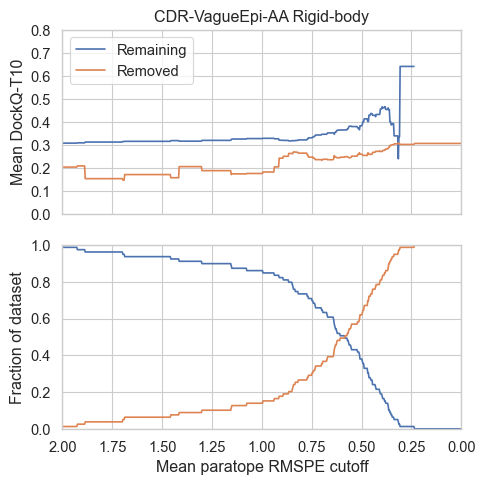

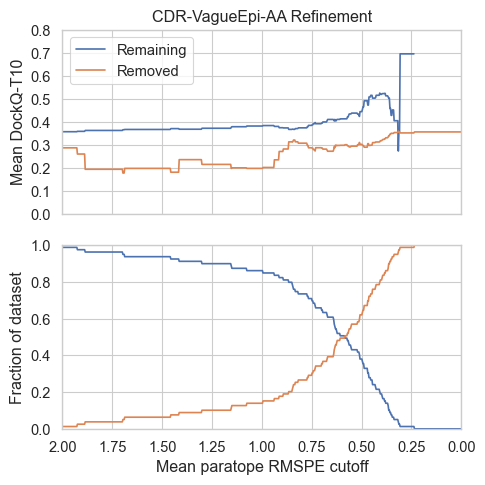

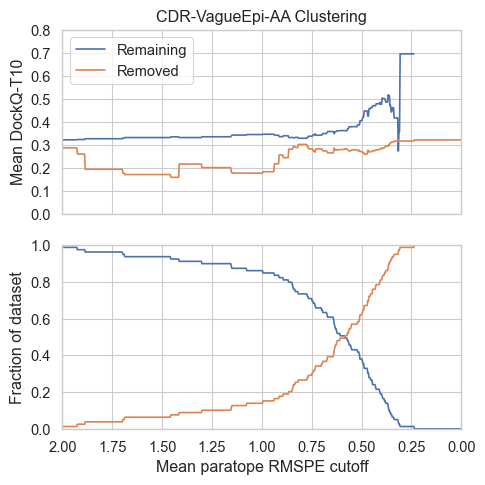

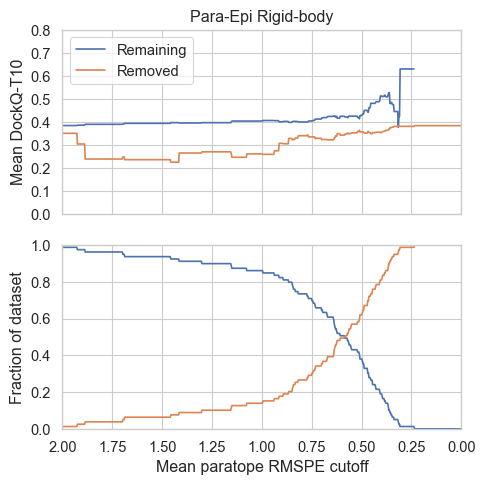

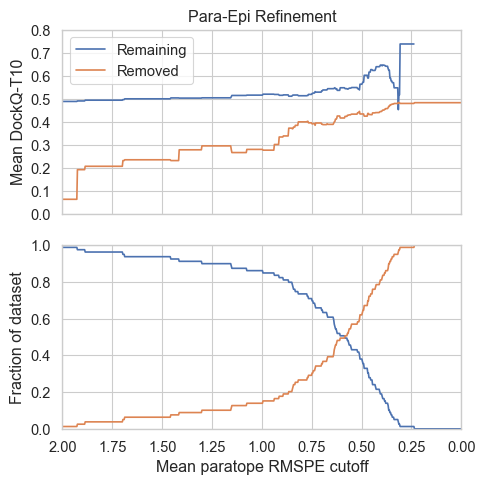

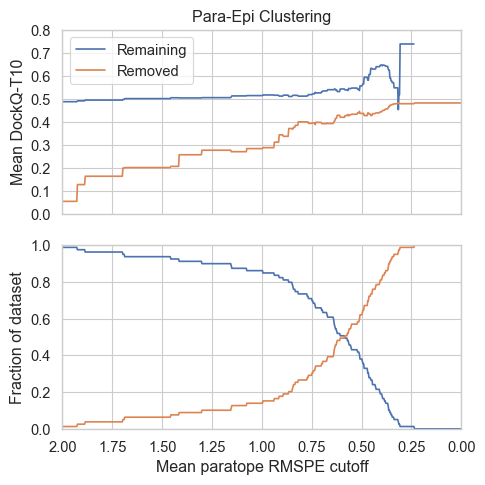

In [17]:
model_name = 'ABodyBuilder2'
model_run_str = 'ab'
local_results_path = Path('../data/results')
RMSPE_cutoffs = np.linspace(0,3,num=1000)
for protocol, protocol_str in protocols_dict.items():
    for stage, eval_folder in stage_to_eval_dict.items():
        model_df = abb2_conf_df.copy()
        model_df['dockq_10'] = [get_top_dockq(local_results_path/f'{pdb}'/
                                               f'run-af2{model_run_str}-{protocol_str}'
                                               /f'{eval_folder}'/'capri_ss.tsv'
                                                 , n_ranks=10) for pdb in model_df['pdb']]
        DockQ_paratope_cutoff_remain = [model_df.query('para_ave_conf < @cutoff')['dockq_10'].mean() for cutoff in
                                     RMSPE_cutoffs]
        DockQ_paratope_cutoff_remove = [model_df.query('para_ave_conf >= @cutoff')['dockq_10'].mean() for cutoff in
                             RMSPE_cutoffs]

        count_paratope = np.array([len(model_df.query('para_ave_conf < @cutoff')) for cutoff in RMSPE_cutoffs])
        frac_paratope = count_paratope / len(model_df)
        frac_remain_dockq10_para = DockQ_paratope_cutoff_remain[np.where(frac_paratope>=frac_remaining)[0][0]]
        frac_remove_dockq10_para = DockQ_paratope_cutoff_remove[np.where(frac_paratope>=frac_remaining)[0][0]]

        print(f"{protocol=}, {stage=} {frac_remaining=}")
        print(f"{frac_remain_dockq10_para=}, {frac_remove_dockq10_para=}, full set mean {model_df['dockq_10'].mean()}")

        fig, ax = plt.subplots(2, figsize=(5, 5), sharex=True)
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remain, label='Remaining')
        ax[1].plot(RMSPE_cutoffs, frac_paratope, label='Remaining')
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remove, label='Removed')
        ax[1].plot(RMSPE_cutoffs, 1-frac_paratope, label='Removed')

        frac_paratope = count_paratope / len(af2_plddt_antibody_df)

        ax[1].set_xlabel('Mean paratope RMSPE cutoff')
        ax[0].set_ylabel(r'Mean DockQ-T10')
        ax[1].set_ylabel('Fraction of dataset')
        ax[1].set_ylim([0, 1])
        ax[0].set_xlim([2.0, 0])
        ax[0].set_ylim(0.,0.8)
        ax[0].set_yticks([i*0.1 for i in range(9)])
        ax[0].set_title(f'{protocol} {stage}')
        ax[0].legend(loc='best')
        fig.tight_layout()
        fig.savefig(plot_folder / f'RMSPE_cutoff_vs_DockQ-T10_{protocol}_{stage}.png', dpi=200)


protocol='CDR-VagueEpi-AA', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.320125, frac_remove_dockq10_para=0.1597142857142857, full set mean 0.3059113924050633
protocol='CDR-VagueEpi-AA', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.3730694444444445, frac_remove_dockq10_para=0.18314285714285714, full set mean 0.3562405063291139
protocol='CDR-VagueEpi-AA', stage='Clustering' frac_remaining=0.9
frac_remain_dockq10_para=0.33811111111111114, frac_remove_dockq10_para=0.15057142857142855, full set mean 0.32149367088607606
protocol='Para-Epi', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.39859722222222227, frac_remove_dockq10_para=0.22657142857142856, full set mean 0.3833544303797468
protocol='Para-Epi', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.5063194444444444, frac_remove_dockq10_para=0.24885714285714286, full set mean 0.48350632911392416
protocol='Para-Epi', stage='Clustering' frac_remaining=0.9
frac_remain_

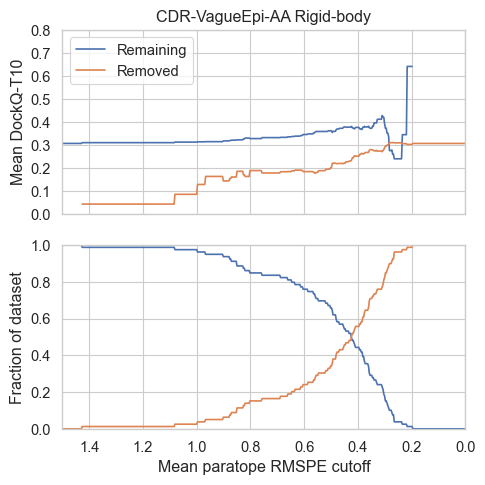

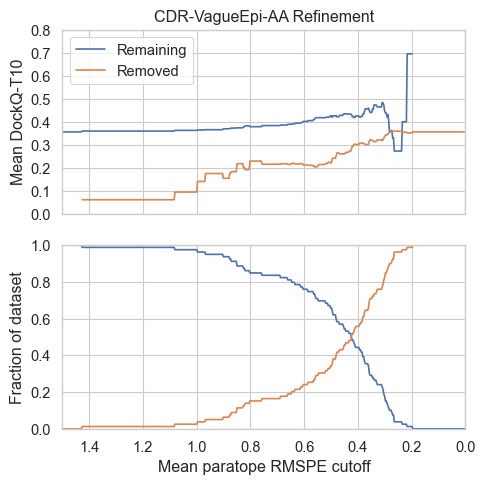

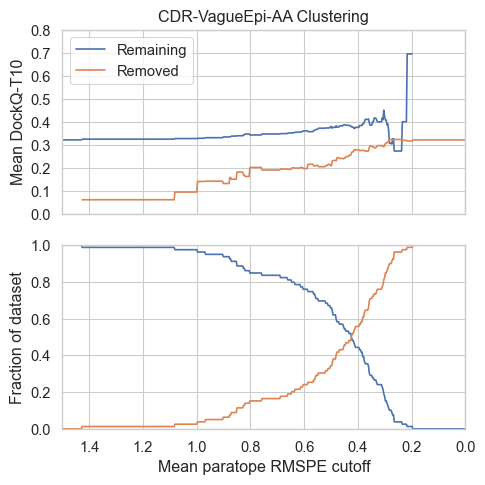

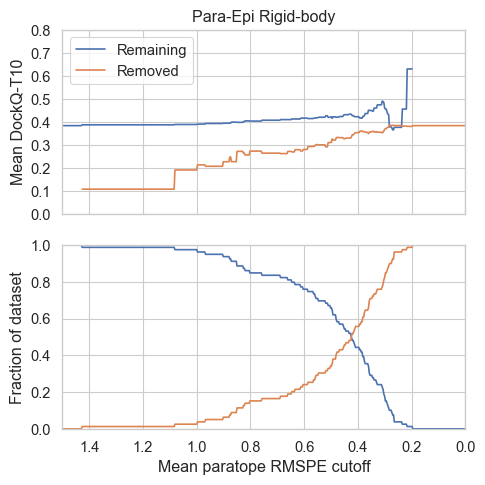

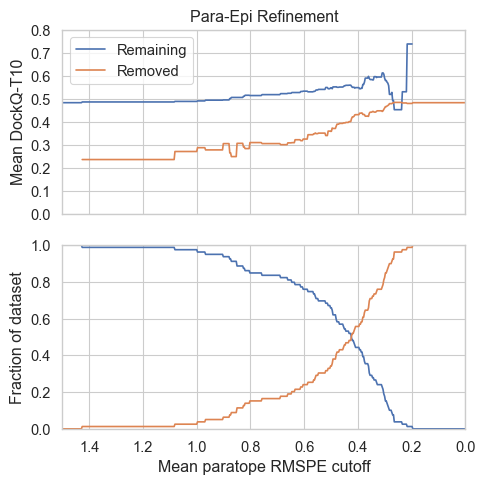

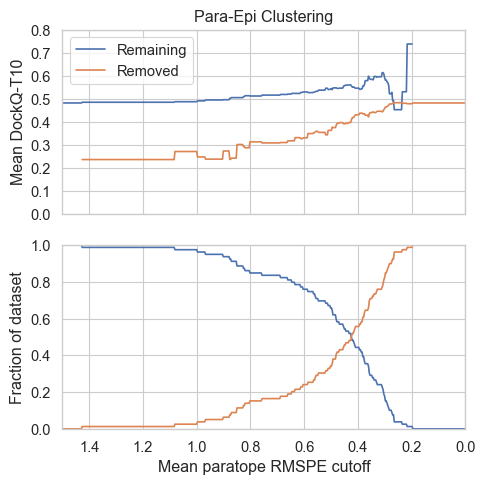

In [18]:
model_name = 'ABodyBuilder2'
model_run_str = 'ab'
local_results_path = Path('../data/results')
RMSPE_cutoffs = np.linspace(0,3,num=1000)
for protocol, protocol_str in protocols_dict.items():
    for stage, eval_folder in stage_to_eval_dict.items():
        model_df = abb2_conf_df.copy()
        model_df['dockq_10'] = [get_top_dockq(local_results_path/f'{pdb}'/
                                               f'run-af2{model_run_str}-{protocol_str}'
                                               /f'{eval_folder}'/'capri_ss.tsv'
                                                 , n_ranks=10) for pdb in model_df['pdb']]
        DockQ_paratope_cutoff_remain = [model_df.query('para_vague_ave_conf < @cutoff')['dockq_10'].mean() for cutoff in
                                     RMSPE_cutoffs]
        DockQ_paratope_cutoff_remove = [model_df.query('para_vague_ave_conf >= @cutoff')['dockq_10'].mean() for cutoff in
                             RMSPE_cutoffs]

        count_paratope = np.array([len(model_df.query('para_vague_ave_conf < @cutoff')) for cutoff in RMSPE_cutoffs])
        frac_paratope = count_paratope / len(model_df)
        frac_remain_dockq10_para = DockQ_paratope_cutoff_remain[np.where(frac_paratope>=frac_remaining)[0][0]]
        frac_remove_dockq10_para = DockQ_paratope_cutoff_remove[np.where(frac_paratope>=frac_remaining)[0][0]]

        print(f"{protocol=}, {stage=} {frac_remaining=}")
        print(f"{frac_remain_dockq10_para=}, {frac_remove_dockq10_para=}, full set mean {model_df['dockq_10'].mean()}")

        fig, ax = plt.subplots(2, figsize=(5, 5), sharex=True)
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remain, label='Remaining')
        ax[1].plot(RMSPE_cutoffs, frac_paratope, label='Remaining')
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remove, label='Removed')
        ax[1].plot(RMSPE_cutoffs, 1-frac_paratope, label='Removed')

        frac_paratope = count_paratope / len(af2_plddt_antibody_df)

        ax[1].set_xlabel('Mean paratope RMSPE cutoff')
        ax[0].set_ylabel(r'Mean DockQ-T10')
        ax[1].set_ylabel('Fraction of dataset')
        ax[1].set_ylim([0, 1])
        ax[0].set_xlim([1.5, 0])
        ax[0].set_ylim(0.,0.8)
        ax[0].set_yticks([i*0.1 for i in range(9)])
        ax[0].set_title(f'{protocol} {stage}')
        ax[0].legend(loc='best')
        fig.tight_layout()
        fig.savefig(plot_folder / f'RMSPE_vague_cutoff_vs_DockQ-T10_{protocol}_{stage}.png', dpi=200)


protocol='CDR-VagueEpi-AA', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_para=0.2866142857142857, frac_remove_dockq10_para=0.2038888888888889, full set mean 0.27718987341772156
protocol='CDR-VagueEpi-AA', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_para=0.3297857142857143, frac_remove_dockq10_para=0.19922222222222224, full set mean 0.3149113924050633
protocol='CDR-VagueEpi-AA', stage='Clustering', frac_remaining=0.9
frac_remain_dockq10_para=0.3128428571428571, frac_remove_dockq10_para=0.17755555555555558, full set mean 0.29743037974683545
protocol='Para-Epi', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_para=0.39265714285714287, frac_remove_dockq10_para=0.25333333333333335, full set mean 0.37678481012658227
protocol='Para-Epi', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_para=0.49788571428571415, frac_remove_dockq10_para=0.33266666666666667, full set mean 0.4790632911392404
protocol='Para-Epi', stage='Clustering', frac_remaining

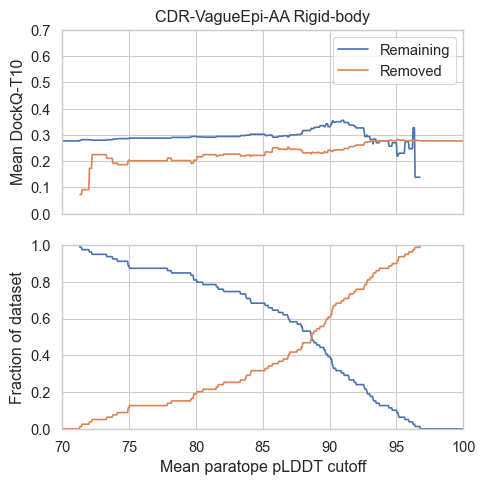

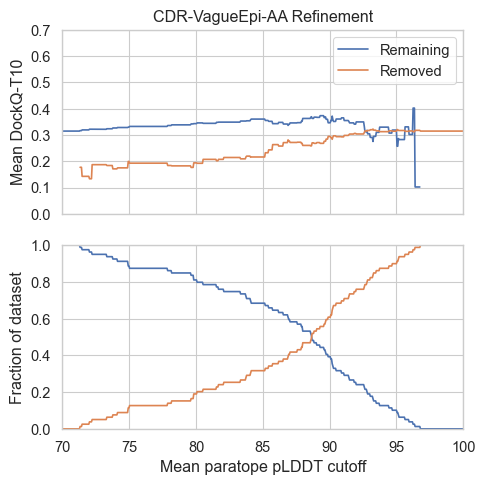

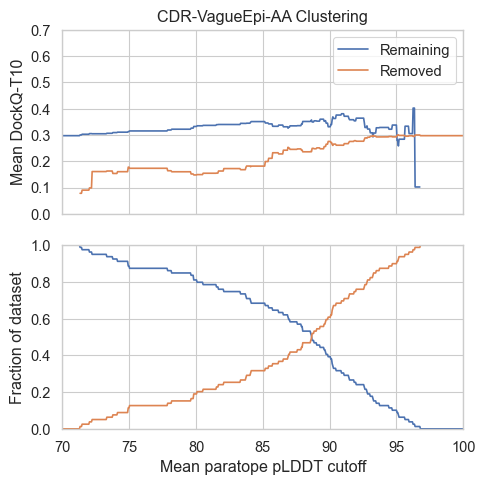

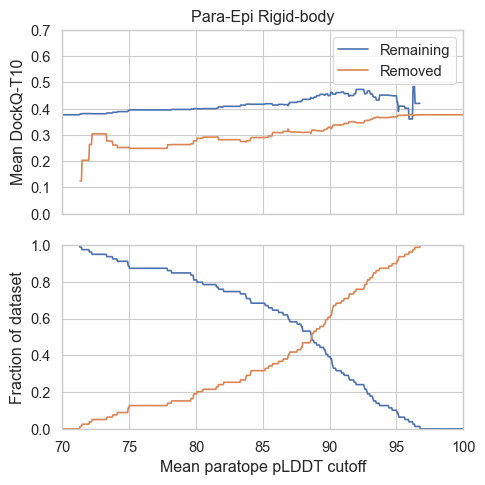

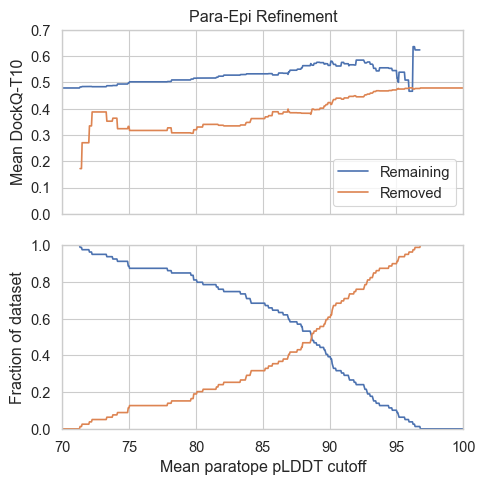

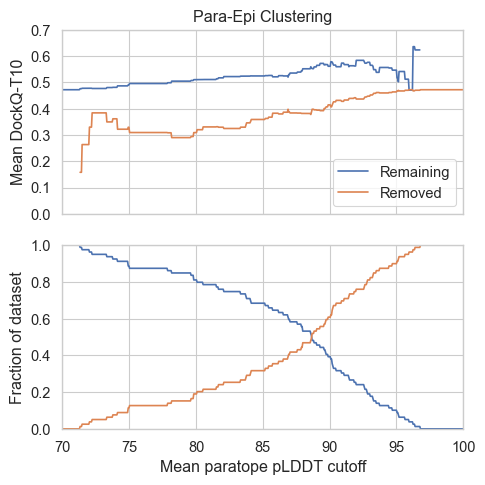

In [19]:
model_name = 'AlphaFold2'
model_run_str = 'af2'
local_results_path = Path('../data/results')
plddt_cutoffs = np.linspace(50,100,num=1000)
for protocol, protocol_str in protocols_dict.items():
    for stage, eval_folder in stage_to_eval_dict.items():
        antibody_model_df = af2_plddt_antibody_df.copy()
        antibody_model_df['dockq_10'] = [get_top_dockq(local_results_path/f'{pdb}'/
                                               f'run-af2{model_run_str}-{protocol_str}'
                                               /f'{eval_folder}'/'capri_ss.tsv'
                                                 , n_ranks=10) for pdb in antibody_model_df['pdb']]
        DockQ_paratope_cutoff_remain = [antibody_model_df.query('plddt_ave_para_epi > @cutoff')['dockq_10'].mean() for cutoff in
                                     plddt_cutoffs]
        DockQ_paratope_cutoff_remove = [antibody_model_df.query('plddt_ave_para_epi <= @cutoff')['dockq_10'].mean() for cutoff in
                                     plddt_cutoffs]

        count_paratope = np.array([len(antibody_model_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
        frac_paratope = count_paratope / len(antibody_model_df)

        frac_remain_dockq10_para = DockQ_paratope_cutoff_remain[np.where(frac_paratope<=frac_remaining)[0][0]]

        frac_remove_dockq10_para = DockQ_paratope_cutoff_remove[np.where(frac_paratope<=frac_remaining)[0][0]]

        print(f"{protocol=}, {stage=}, {frac_remaining=}")
        print(f"{frac_remain_dockq10_para=}, {frac_remove_dockq10_para=}, full set mean {antibody_model_df['dockq_10'].mean()}")

        fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
        ax[0].plot(plddt_cutoffs,DockQ_paratope_cutoff_remain,label="Remaining")
        ax[0].plot(plddt_cutoffs,DockQ_paratope_cutoff_remove,label="Removed")
        ax[1].plot(plddt_cutoffs,frac_paratope, label="Remaining")
        ax[1].plot(plddt_cutoffs,1-frac_paratope, label="Removed")
        ax[0].legend(loc='best')
        ax[1].set_xlabel('Mean paratope pLDDT cutoff')
        ax[0].set_ylabel(r'Mean DockQ-T10')
        ax[1].set_ylabel('Fraction of dataset')
        ax[1].set_ylim([0, 1])
        ax[0].set_xlim([70, 100])
        ax[0].set_ylim(0.,0.7)
        ax[0].set_yticks([i*0.1 for i in range(8)])

        ax[0].set_title(f'{protocol} {stage}')
        fig.tight_layout()
        fig.savefig(plot_folder / f'plddt_paratope_cutoff_vs_DockQ-T10_{protocol}_{stage}.png', dpi=200)

In [8]:
model_dict = {'ABodyBuilder2':'ab','AlphaFold2':'af2','ABlooper':'abl','IgFold':'ig'}
plddt_cutoffs = np.linspace(50,100,num=1000)
for model_name, model_run_str in model_dict.items():
    for protocol, protocol_str in protocols_dict.items():
        for stage, eval_folder in stage_to_eval_dict.items():
            antibody_model_df = af2_plddt_antibody_df.copy()
            antigen_model_df = af2_plddt_antigen_df.copy()
            antigen_model_df['dockq_10'] = [get_top_dockq(local_results_path/f'{pdb}'/
                                           f'run-af2{model_run_str}-{protocol_str}'
                                           /f'{eval_folder}'/'capri_ss.tsv'
                                             , n_ranks=10) for pdb in antigen_model_df['pdb']]
            DockQ_epitope_cutoff_remain = [antigen_model_df.query('plddt_ave_para_epi > @cutoff')['dockq_10'].mean() for cutoff in
                                 plddt_cutoffs]
            DockQ_epitope_cutoff_remove = [antigen_model_df.query('plddt_ave_para_epi <= @cutoff')['dockq_10'].mean() for cutoff in
                                 plddt_cutoffs]

            count_epitope = np.array([len(antigen_model_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
            frac_epitope = count_epitope / len(antigen_model_df)

            frac_remain_dockq10_epi = DockQ_epitope_cutoff_remain[np.where(frac_epitope<=frac_remaining)[0][0]]

            frac_remove_dockq10_epi = DockQ_epitope_cutoff_remove[np.where(frac_epitope<=frac_remaining)[0][0]]

            print(f"{model_name=}")
            print(f"{protocol=}, {stage=}, {frac_remaining=}")
            print(f"{frac_remain_dockq10_epi=}, {frac_remove_dockq10_epi=}, full set mean {antigen_model_df['dockq_10'].mean()}")



            fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
            ax[0].plot(plddt_cutoffs,DockQ_epitope_cutoff_remain, label='Remaining')
            ax[0].plot(plddt_cutoffs,DockQ_epitope_cutoff_remove, label='Removed')
            ax[1].plot(plddt_cutoffs,frac_epitope, label='Remaining')
            ax[1].plot(plddt_cutoffs,1-frac_epitope, label='Removed')
            ax[0].legend(loc='best')
            ax[1].set_xlabel('Mean epitope pLDDT cutoff')
            ax[0].set_ylabel(r'Mean DockQ-T10')
            ax[1].set_ylabel('Fraction of dataset')
            ax[1].set_ylim([0, 1])
            ax[0].set_xlim([60, 100])
            ax[0].set_title(f'{protocol} {stage} {model_name}')
            fig.tight_layout()
            fig.savefig(plot_folder / f'plddt_epitope_cutoff_vs_DockQ-T10_{model_name}_{protocol}_{stage}.png', dpi=200)
            plt.close()


model_name='ABodyBuilder2'
protocol='CDR-VagueEpi-AA', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_epi=0.3121267605633803, frac_remove_dockq10_epi=0.25075000000000003, full set mean 0.3059113924050633
model_name='ABodyBuilder2'
protocol='CDR-VagueEpi-AA', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_epi=0.37004225352112674, frac_remove_dockq10_epi=0.23375, full set mean 0.3562405063291139
model_name='ABodyBuilder2'
protocol='CDR-VagueEpi-AA', stage='Clustering', frac_remaining=0.9
frac_remain_dockq10_epi=0.33221126760563385, frac_remove_dockq10_epi=0.226375, full set mean 0.32149367088607606
model_name='ABodyBuilder2'
protocol='Para-Epi', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_epi=0.3920281690140845, frac_remove_dockq10_epi=0.30637500000000006, full set mean 0.3833544303797468
model_name='ABodyBuilder2'
protocol='Para-Epi', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_epi=0.4991126760563381, frac_remove_dockq10_epi=0.345, f